<h4>shearing Image</h4>

In [2]:
import cv2
import numpy as np

In [3]:
img =cv2.imread('images/lenna.png')

In [4]:
#Define shearing factors (adjust as needed)
shear_x = 0.40 #Shear along x-axis
shear_y = -0.25 # Shear along y-axis

# Create transformation matrix
M = np.array([[1,shear_x,0],
              [shear_y,1,0],
              [0,0,1]])

rows, cols, _ = img.shape

T = np.float32([[1,0,0],[0,1,150]])

# We use warpAffine to transform the using the matrix , T
img_translation = cv2.warpAffine(img, T,(int(cols*1.5),int(rows*1.5)))

sheared_img = cv2.warpPerspective(img_translation, M,(int(cols*1.5), int(rows*1.5)))

In [5]:
cv2.imshow('Sheared Image',sheared_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
sheared_img.shape

(768, 768, 3)

<h4>Shearing using skimage</h4>

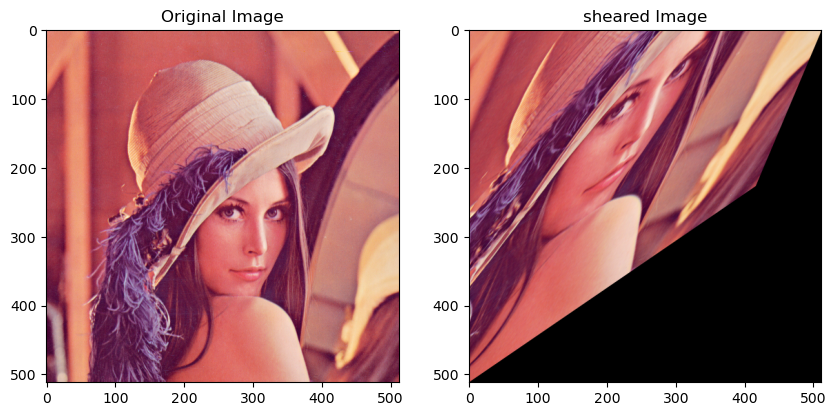

In [8]:
from skimage import transform
from skimage import io

img = io.imread('images/lenna.png')

# Define shearing factors
shear_x = -0.4
shear_y = -0.6

# create transformation matrix
tform = transform.AffineTransform(shear = (shear_x, shear_y))

#Apply transformation using warp
img_sheared = transform.warp(img, tform)

# Display images (using matplotlib)
import matplotlib.pyplot as plt
plt.figure(figsize =(10,6))
plt.subplot(121), plt.imshow(img), plt.title('Original Image')
plt.subplot(122), plt.imshow(img_sheared), plt.title('sheared Image')
plt.show()

<h4>Affine Transformation</h4>

In [10]:
img = cv2.imread('images/lenna.png')

# Define transformation parameters
tx = 50 # Translation alomg x- axis
ty = 100 # Translation alomg y- axis
angle =45 # Rotation angle in degrees
scale = 1.2 # Scaling factor
shear_x = 0.3 # Shearing along x-axis
shear_y = 0.2 # Shearing along y - axis

# create the transformation matrix
M = np.float32([[scale * np.cos(np.radians(angle)),shear_x,tx],
                [shear_y,scale * np.sin(np.radians(angle)),ty]])

#Apply transformation using warpAffine
img_affine = cv2.warpAffine(img, M, (512,512))

new_image = np.vstack([img, img_affine])

# Display original and affine transformed images 
cv2.imshow('Affine Transformed image',new_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
img = cv2.imread('images/lenna.png')

# Define transformation parameters
tx = 100 # Translation alomg x- axis
ty = 100 # Translation alomg y- axis
angle =40 # Rotation angle in degrees
scale = 0.6 # Scaling factor
shear_x = 0.2 # Shearing along x-axis
shear_y = 0 # Shearing along y - axis

# create the transformation matrix
M = np.float32([[scale * np.cos(np.radians(angle)),shear_x,tx],
                [shear_y,scale * np.sin(np.radians(angle)),ty]])

#Apply transformation using warpAffine
img_affine = cv2.warpAffine(img, M, (512,512))

new_image = np.hstack([img, img_affine])

# Display original and affine transformed images 
cv2.imshow('Affine Transformed image',new_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
M

array([[  0.45962667,   0.2       , 100.        ],
       [  0.        ,   0.38567257, 100.        ]], dtype=float32)

Affine Transform Using skimage

(<Axes: title={'center': 'Affine Transform image'}>,
 Text(0.5, 1.0, 'Affine Transform image'))

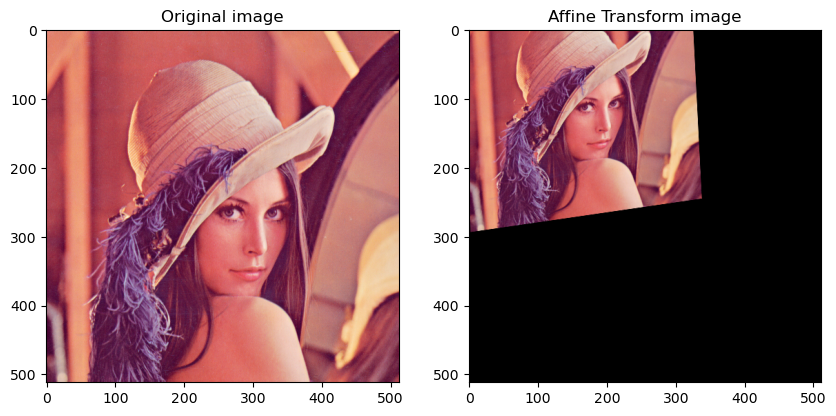

In [28]:
from skimage import io
from skimage import transform
img = io.imread('images/lenna.png')

# Define transformation parameters
tx = 20 # Translation alomg x- axis
ty = 50 # Translation alomg y- axis
angle = 20 # Rotation angle in degrees
scale = 1.5 # Scaling factor
shear_x = -0.3 # Shearing along x-axis
shear_y = 0.2 # Shearing along y - axis

# create the transformation matrix
tform = transform.AffineTransform(scale=(scale, scale),
                                 rotation=np.radians(angle),
                                 translation=(tx,ty),
                                 shear = (shear_x,shear_y))

#Apply transformation using warpAffine
img_affine = transform.warp(img, tform)

# Display original and affine transformed images 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.subplot(121), plt.imshow(img) ,plt.title("Original image")
plt.subplot(122), plt.imshow(img_affine) ,plt.title("Affine Transform image")

<h4>Projective Tramsformation</h4>

In [38]:
import cv2
import numpy as np
img = cv2.imread("images/lenna.png")
#Define source an destination  points (4 corresponding points)
source_points = np.array([[100,50],[200,50],[200,150],[100,150]],
                        dtype=np.float32)
destination_points = np.array([[50,50],[250,50],[200,250],[50,250]],
                             dtype=np.float32)

M = cv2.findHomography(source_points, destination_points)[0]

img_tranfomrmed = cv2.warpPerspective(img, M, (1024,1024))

# Display original and affine transformed images 
cv2.imshow('Original image',img)
cv2.imshow('Projective Transformed image',img_tranfomrmed)
cv2.waitKey(0)
cv2.destroyAllWindows()

<h4>Projective Transformation using skimage</h4>

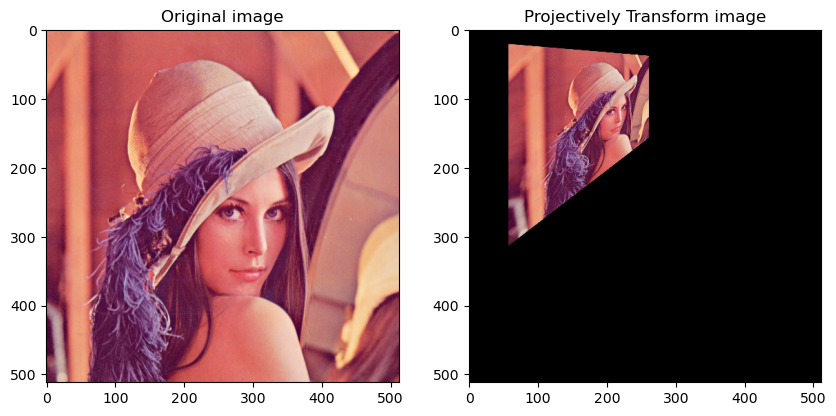

In [36]:
from skimage import io
from skimage import transform

img = io.imread("images/lenna.png")
#Define source an destination  points (4 corresponding points)
source_points = [[100,50],[200,50],[200,150],[100,150]]
destination_points = [[50,50],[250,50],[250,350],[50,250]]

# Create transformation object
tform = transform.ProjectiveTransform()

#fit the transformation using source and destinatin points
tform.estimate(source_points, destination_points)

# Apply transformation using warp
img_tranfomrmed = transform.warp(img, tform)

# Display original and affine transformed images 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.subplot(121), plt.imshow(img) ,plt.title("Original image")
plt.subplot(122), plt.imshow(img_tranfomrmed) ,
plt.title("Projectively Transform image")
plt.show()

<h4>Morphological Transformatiion</h4>

In [45]:
import  numpy as np

# load image and convert to grascale (if needed)
gray =cv2.imread('images/lenna.png',0)
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Threshold to create binary image
ret, thresh = cv2.threshold(gray,127,255, cv2.THRESH_BINARY)

# Erosion - remove noise
eroded = cv2.erode(thresh, np.ones((3, 3), np.uint8))

# Dilation - expand objects
dilated = cv2.dilate(thresh, np.ones((3,3), np.uint8))

# Opening - reduce noise while preserving object size
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

#Closing -fill small holes
closing= cv2.morphologyEx(thresh,cv2.MORPH_CLOSE, np.ones((3,3), np.uint8))

# Display results
cv2.imshow('Original image',thresh)
cv2.imshow('Eroded',eroded)
cv2.imshow('Dilated',dilated)
cv2.imshow('Opening',opening)
cv2.imshow('Cloing',closing)
cv2.waitKey(0)
cv2.destroyAllWindows()